# MACTI_LIB: graficación

**Objetivo general.**

Revisar las herramientas de graficación de la biblioteca MACTI_LIB.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/Curso_Macti/tree/main/03_Cuadernos_Interactivos/SymPy">Introducción a Sympy</a>, Diseño de cursos interactivos con la plataforma Macti by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

## Motivación

En la documentación de Matplotlib se puede observar una descripción gráfica como la siguiente:

<img src="https://matplotlib.org/stable/_images/anatomy.png" width=500>

[<a href="https://matplotlib.org/stable/_images/anatomy.png">https://matplotlib.org/stable/_images/anatomy.png</a>]


* Es posible manipular casi cualquier elemento de la gráfica para obtener los resultados que deseamos.
* Sin embargo, es posible que las instrucciones necesarias para realizar una gráfica se extiendan cada vez más, haciendo complicado entender todo el proceso y sobre todo la reutización.
* Por ejemplo, para generar la siguiente gráfica:

<img src="./TFR.png" width=800>

Se requiere de códigos bastante largos, a continuación se muestra un extracto:

<div class="alert alert-info">

**Extracto de código en Python para genera la gráfica de población**

```python
def set_canvas(data, time, value, country, figsize, xstep=10, ystep = 1):   
    p_max, y_max, p_min, y_min, x_min, x_max = maxmin(data, time, value, country)
    print('Máximo = {}, \t País : {}'.format(y_max, p_max))
    print('Mínimo = {}, \t País : {}'.format(y_min, p_min))
    
    # Se generan los yticks
    yticks = [i for i in range(0, ceil(y_max)+1, ystep)]

    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    
    if not data.empty:
        data.plot(x=time, y=value, color='lightgray', rot = 70, xlabel='', lw = 0.5, ax = ax, label='', legend=False)
        
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_ylim(y_min,y_max)
    ax.set_yticks(yticks)
    ax.set_xticks([a for a in range(x_min, x_max+1, xstep)])
    ax.grid(lw=0.5, color='gainsboro')

    return fig, ax

def plot_country(ax, country, time='Year(s)', value = 'Value', color='gray', label='', maxim = 2021, ): 
    x = country[time][country[time]>=maxim-1]
    y = country[value][country[time]>=maxim-1]
    ax.plot(x, y, c=color, ls = '--', lw = 0.75)

    x = country[time][country[time]<maxim]
    y = country[value][country[time]<maxim]
    ax.plot(x, y, c=color, ls = '-', lw = 2.0, label=label)

# Construcción de la gráfica

fig, ax = set_canvas(TFR, 'Year(s)', 'Value', 'Country or Area', (10,7))

ax.plot([years[-1], years[0]],[2.1,2.1], c='dimgray', ls = 'solid', lw=0.75)
ax.plot([years[-1], years[0]],[2.1,2.1], c='dimgray', ls = 'solid', alpha=0.25, lw=2.75) 

ax.set_title('Promedio de número de hijos por mujer', loc='left', color='gray', fontsize=10)
ax.set_title('fuente: http://data.un.org', loc='right', color='gray', fontstyle='italic', fontsize=10)
plt.suptitle('Evolución del TFR (Total Fertility Rate)', y = 0.96, color='black', fontsize=14)
ax.annotate('Nivel de \n reemplazo \n promedio = 2.1', 
             xy=(2090, 2.095), xytext=(2090, 4.0),
             bbox=dict(boxstyle='round', facecolor='whitesmoke', edgecolor='gray', alpha=0.75, linewidth=0.5),
             arrowprops=dict(arrowstyle='->', facecolor='dimgray', edgecolor='dimgray'),
             fontsize=8, color='black', horizontalalignment='center')

c_to_plot = [('Niger', 'Nigeria', 'darkred'), 
             ('Central African Republic', 'República Centroafricana', 'red'),
             ...,
            ]

for c in c_to_plot:
    c_tfr = TFR_group.get_group(c[0]).dropna()
    plot_country(ax, c_tfr, color=c[2])
    ytext = c_tfr['Value'][c_tfr['Year(s)'] == 2020].values[0]
    ytext_i = c_tfr['Value'][c_tfr['Year(s)'] == 1950].values[0]

    ...

    plt.annotate(c[1]+": {:.2f}".format(ytext), xy = (xy_x, ytext), xytext = (xytext_x, ytext+yoff), 
                     color = c[2], fontsize=8, fontweight='bold',
                     bbox=dict(boxstyle='round', fc='white', ec='gainsboro', alpha=0.75, linewidth=0.25),
                     arrowprops=dict(arrowstyle='-', color=c[2]))

plt.savefig('TFR.png', dpi=300)
plt.show()

```

</div>

* Es posible que en el proceso de desarrollo de este tipo de figuras, se vayan generando herramientas que pueden ser de utilidad a otros usuarios.
* Para ello se pueden compartir funciones o módulos con los códigos generados.
* También se puede construir una biblioteca que facilite el uso de las características actuales de Matplotlib y/o que agregue otras.

**El módulo `macti.visual`**

* Fue incentivado por la necesidad de graficar datos de simulaciones computacionales.
* Se busca facilitar el uso de algunas características y que tenga compatibilidad con la forma en que se usan las funciones de Matplotlib.
* Se tiene pensando agregar interactividad y otras características para graficación en 3D.
* Se busca siempre tener actualización con las últimas versiones de matplotlib.
* Está en constante desarrollo.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as vis

## Definiendo un plotter

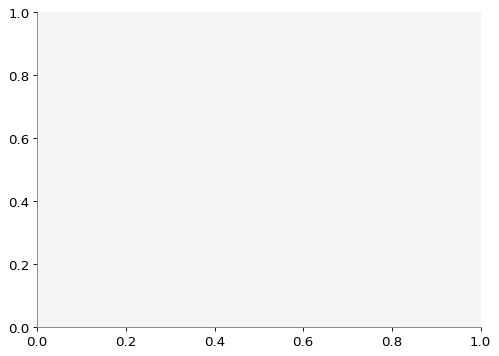

In [2]:
# Defino un plotter donde es posible realizar gráficas.
vis.Plotter()

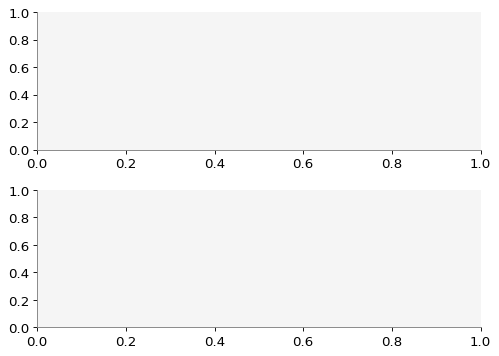

In [3]:
# Puedo definir varias gráficas en un plotter.
vis.Plotter(2,1)

## Graficación de vectores en 2D

[1 2] [5 1]


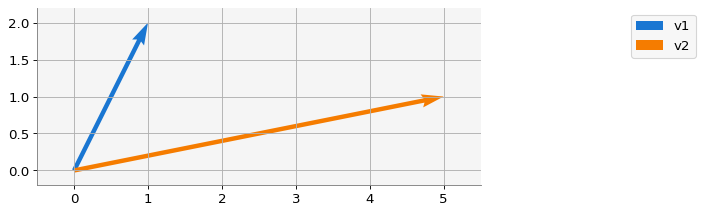

In [4]:
# Defino los vectores usando numpy
v1 = np.array([1,2])
v2 = np.array([5,1])

print(v1, v2)

# Defino un plotter
v = vis.Plotter()

# Grafico los vectores
v.plot_vectors(1, [v1, v2], ['v1', 'v2'])

# Muestro la rejilla
v.grid()

[1 2] [ 5 10]


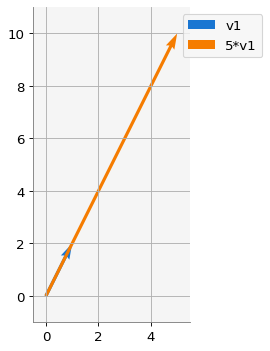

In [5]:
print(v1, 5*v1)
v = vis.Plotter()

# Algunos parámetros de la función
v.plot_vectors(1, [v1, 5*v1], ['v1', '5*v1'], w=0.020)

v.grid()

### Suma de vectores en 2D

La función `plot_vectors_sum()` muestra gráficamente la suma de dos vectores en 2D.

[1 2] [5 1] [6 3]


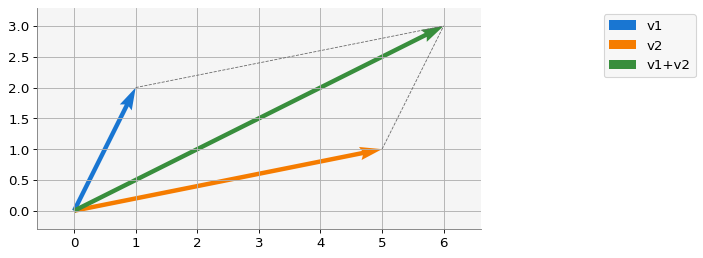

In [6]:
print(v1, v2, v1+v2)

v = vis.Plotter()

v.plot_vectors_sum(1, [v1, v2], ['v1', 'v2'])
v.grid()

## Varias gráficas en una figura

Todas las funciones disponibles en `macti.visual` son compatibles con Matplotlib.

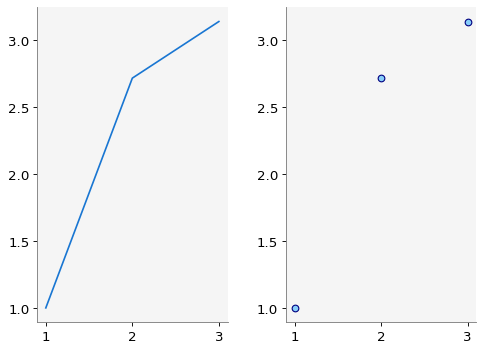

In [7]:
# Defino un plotter con un arreglo de 1 renglón y 2 columnas de gráficas.
v = vis.Plotter(1,2)

# Datos a graficar
x = np.array([1,2,3])
y = np.array([1,2.718281828459045,3.141592653589793])

# Las funciones de graficación son un subconjunto de las de matplotlib
# OJO con el primer parámetro en la llamada a la función:
v.plot(1, x, y)

# Se usan los mismos parámetros de las funciones de matplotlib, 
v.scatter(2, x, y, fc = 'lightskyblue', ec = 'navy')

# Similar al plt.show()
v.show()

## Parámetros de la figura y de los ejes de cada subgráfica

Los parámetros para la figura y los ejes de cada subgráfica se deben pasar como diccionarios. Existen al menos dos opciones:

1. Definiendo un diccionario como se hace normalmente en Python:
```python
d1 = {'par1':'val1', 'par2':'val2', ...}
```

2. Usando la función `dict()` para crear un diccionario: 
```python
d1 = dict(par1 = 'val1', par2 = 'val2', ...)
```
Una dez definido el diccionario, se puede usar, por ejemplo, como sigue:

```python
v = vis.Plotter(1, 2, d1)
```


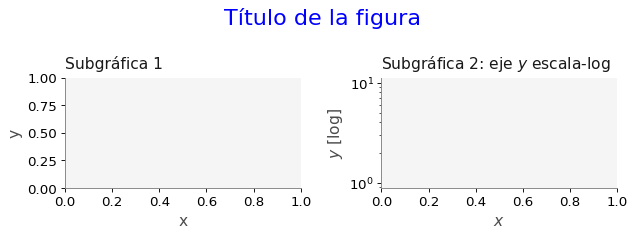

In [8]:
# Parámetros para la figura
param_fig ={'figsize':(8,3)}

# Parámetros para las subgráficas (lista de diccionarios)
param_ejes = [
    # Subgráfica 1
    {'title':'Subgráfica 1', 
     'xlabel':'x', 
     'ylabel':'y'},
    
    # Subgráfica 2
    {'title':'Subgráfica 2: eje $y$ escala-log', 
     'yscale':'log', 'xlabel':'$x$', 
     'ylabel':'$y$ [log]'}]

# Parámetros para el título de la figura
param_titulo = dict(color='blue', fontsize=20)

# Se define un arreglo de (1 x 2) subgráficas
v = vis.Plotter(1, 2, 
                param_ejes, 
                param_fig, 
                param_titulo, 
                "Título de la figura")

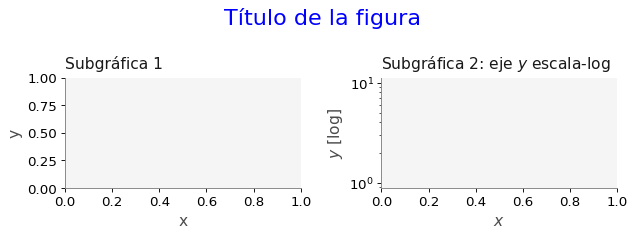

In [9]:
# Parámetros para la figura
param_fig =dict(figsize= (8,3))

# Parámetros para las subgráficas (lista de diccionarios)
param_ejes = [
    # Subgráfica 1
    dict(title='Subgráfica 1', 
         xlabel='x', 
         ylabel='y'),
    
    # Subgráfica 2
    dict(title='Subgráfica 2: eje $y$ escala-log', 
         yscale='log', 
         xlabel='$x$', 
         ylabel='$y$ [log]')]

# Parámetros para el título de la figura
param_titulo = dict(color='blue', fontsize=20)

titulo = "Título de la figura"

# Se define un arreglo de (1 x 2) subgráficas
v = vis.Plotter(1, 2, 
                fig_par = param_fig, 
                title_par = param_titulo, 
                title=titulo,
                axis_par = param_ejes)

## Ejemplo de graficación.

In [10]:
# Generamos algunos datos para graficar
x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)
r = 0.9 * np.random.rand(len(x))
print(x)
print(y)
print(r)

[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]
[ 0.00000000e+00  1.27877162e-01  2.53654584e-01  3.75267005e-01
  4.90717552e-01  5.98110530e-01  6.95682551e-01  7.81831482e-01
  8.55142763e-01  9.14412623e-01  9.58667853e-01  9.87181783e-01
  9.99486216e-01  9.95379113e-01  9.74927912e-01  9.38468422e-01
  8.86599306e-01  8.20172255e-01  7.40277997e-01  6.48228395e-01
  5.45534901e-01  4.33883739e-01  3.15108218e-01  1.91158629e-01
  6.40702200e-02 -6.40702200e-02 -1.91158629e-01 -

In [11]:
# Parámetros para la figura
param_fig ={'figsize':(8,5)}

# Parámetros para las subgráficas (lista de diccionarios)
param_ejes = [
    # Subgráfica 1
    dict(title = 'plot(x,y,par)', 
         xlabel = 'x', 
         ylabel = 'y'),
    
    # Sibgráfica 2
    dict(title = '$f(x) = e^x$', 
         yscale = 'log', 
         xlabel = '$x$', 
         ylabel = '$y$ [log]'),
    
    # Subgráfica 3
    dict(title='Random points', 
         xlabel='n')]

# Parámetros para el título
param_titulo = dict(color='navy', fontsize=20)
titulo = "Tipos de gráficas"

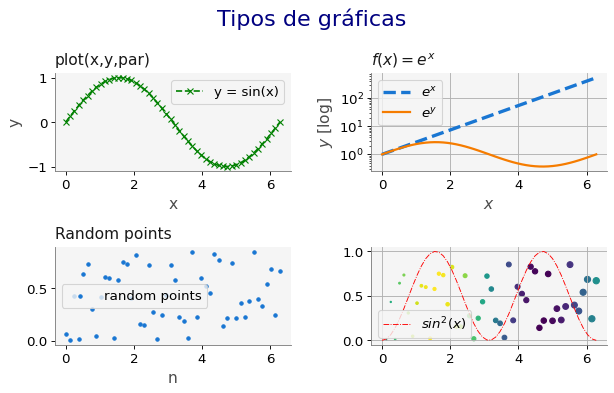

In [12]:
# Se define un arreglo de (2 x 2) subgráficas
v = vis.Plotter(2, 2, param_ejes, param_fig, param_titulo, titulo)

# Primera subgráfica
v.plot(1, x, y, marker = 'x', color='green', ls='--', label='y = sin(x)')

# Segunda subgráfica
v.plot(2, x, np.exp(x), ls='--', lw=3.0, label='$e^x$')
v.plot(2, x, np.exp(y), lw=2.0, label = '$e^y$')

# Tercera subgráfica
v.scatter(3, x, r, marker='.', label='random points')

# Cuarta subgráfica
v.scatter(4, x, r, s = x*5, c = y)
v.plot(4, x, y*y, color = 'r', ls = '-.', lw = 0.80, label = '$sin^2(x)$')

# Acciones sobre subconjuntos de subgráficas
v.grid([2,4]) # se activa la rejilla en las subgráficas 2 y 4
v.legend(frameon=True) # se activan las leyendas en todas las subgráficas
v.show() # similar a plt.show()

## Definición del sistema de coordenadas

Permite tener un sistema de coordenadas con decoración similar a otros sistemas.

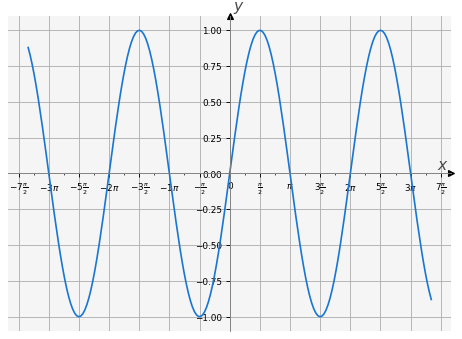

In [13]:
# Se define una sola gráfica
v = vis.Plotter(1,1)

# Algunos datos
x = np.linspace(-10.5, 10.5, 200)

# Graficación de los datos
v.plot(1, x, np.sin(x))

# Definimos el sistema de coordenadas
v.set_coordsys(1)

# Obtenemos los ticks y los ponemos en términos de pi
ax = v.axes(1)
xticks = ax.get_xticks()
yticks = ax.get_yticks()
v.set_ticks(ax, xticks, yticks, trig=True)

v.grid()
v.show()

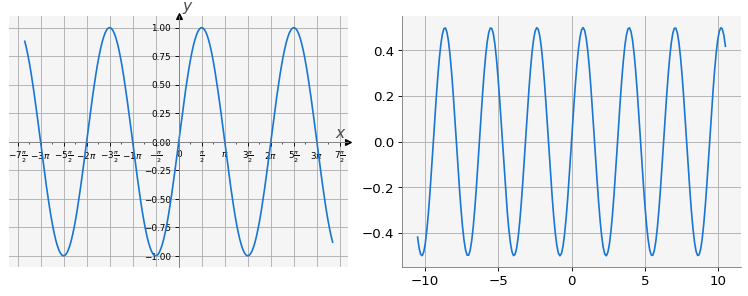

In [14]:
# Se define una sola gráfica
v = vis.Plotter(1,2,fig_par = dict(figsize = (10,4)))

# Algunos datos
x = np.linspace(-10.5, 10.5, 200)

# Gráfica con el sistema de coordenadas 
v.plot(1, x, np.sin(x))

# Definimos el sistema de coordenadas
v.set_coordsys(1)
ax = v.axes(1)
xticks = ax.get_xticks()
yticks = ax.get_yticks()
v.set_ticks(ax, xticks, yticks, trig=True)

# Otra gráfica
v.plot(2, x, np.cos(x)*np.sin(x))

v.grid()
v.show()

## Modelación Computacional

<div class="alert alert-success">

### Ejercicio 1. 

Vamos a generar datos en una rejilla rectangular para graficarlos.

<img src="./malla2D_DF.png"  width='300px'/>

1. Define un dominio de $2 \times 1$ con número de nodos $N_x = 15$ y $N_y = 8$. Con esta información construye una rejilla en 2D usando las funciones `np.linspace()` y `np.meshgrid()`. Finalmente grafica el dominio de estudio (el rectángulo de $2 \times 1$).

</div>

In [88]:
# Tamaño del dominio
Lx = 2.0
Ly = 1.0

# Número de nodos en cada eje
Nx = 15
Ny = 8

# Número total de nodos incluyendo las fronteras
NxT = Nx + 2
NyT = Ny + 2

# Coordenadas de la malla
xn = np.linspace(0,Lx,NxT)
yn = np.linspace(0,Ly,NyT)
xg, yg = np.meshgrid(xn, yn, indexing='ij')

print('Lx = {} \tLy = {}'.format(Lx,Ly))
print('Nx = {} \tNy = {}'.format(Nx,Ny))
print('xn = {} \nyn = {}'.format(xn, yn))

Lx = 2.0 	Ly = 1.0
Nx = 15 	Ny = 8
xn = [0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.    1.125 1.25  1.375
 1.5   1.625 1.75  1.875 2.   ] 
yn = [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


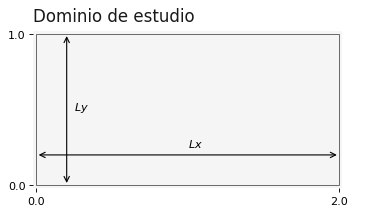

In [89]:
axis_par = [dict(aspect = 'equal')] 
v = vis.Plotter(1,1, axis_par, dict(figsize=(5,5)))

# Definimos un canvas donde graficar
v.set_canvas(1, Lx, Ly)

# Dibujamos el dominio sobre el canvas
v.draw_domain(1, xg, yg)

# Ponemos un titulo a la gráfica
ax1 = v.axes(1)
ax1.set_title('Dominio de estudio', fontsize=15)

v.show()

<div class="alert alert-success">

2. Usando la misma información del punto 1, ahora grafica la malla del dominio.

</div>

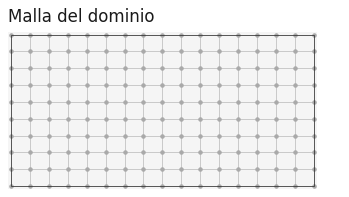

In [90]:
axis_par = [dict(aspect = 'equal')] 
v = vis.Plotter(1,1, axis_par, dict(figsize=(5,5)))

# Definimos un canvas donde graficar
v.set_canvas(1, Lx, Ly)

# Dibujamos la malla y un marco alrededor
v.plot_mesh2D(1, xg, yg, nodeson = True)
v.plot_frame(1, xg, yg, ticks=False)

# Ponemos un titulo a la gráfica
ax1 = v.axes(1)
ax1.set_title('Malla del dominio', fontsize=15)

v.show()

<div class="alert alert-success">

3. Genera un campo escalar en los puntos de la malla usando la siguiente función: $T(x,y) = \sin(\pi * x) * \cos(\pi * y)$ y grafica el resultado usando un mapa de color.

</div>

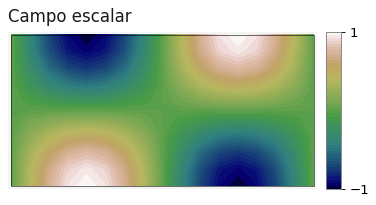

In [100]:
# Generación del campo escalar
T =  np.sin(np.pi * xg) * np.cos(np.pi*yg)

axis_par = [dict(aspect = 'equal')] 
v = vis.Plotter(1,1, axis_par, dict(figsize=(5,5)))

# Definimos un canvas donde graficar
cax = v.set_canvas(1, Lx, Ly)

# Graficamos usando contourf()
c = v.contourf(1, xg, yg, T, ticks = False, levels = 50, cmap = 'gist_earth')

# Se define una barra de colores
v.fig.colorbar(c, cax=cax, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')

# Se grafica un marco
v.plot_frame(1, xg, yg, ticks=False)

# Se agrega una título a la gráfica
v.axes(1).set_title('Campo escalar', fontsize=15)

v.show()

<div class="alert alert-success">

4. Genera un campo vectorial en los puntos de la malla usando la siguientes funciones para las componentes:

$$
\begin{eqnarray}
U(x,y) & = & -A * \cos(\pi \alpha y) * \sin(\pi \alpha x) \\
V(x,y) & = & A * \sin(\pi \alpha y) * \cos(\pi \alpha x)
\end{eqnarray}
$$

donde $A = 1$ y $\alpha = 1.25$. Posteriormente grafica el resultado.

</div>

In [92]:
# Generación del campo vectorial
A = 1.0
alpha = 1.25
U = -A * np.cos(np.pi * alpha * yg) * np.sin(np.pi * alpha * xg)
V =  A * np.sin(np.pi * alpha * yg) * np.cos(np.pi * alpha * xg)

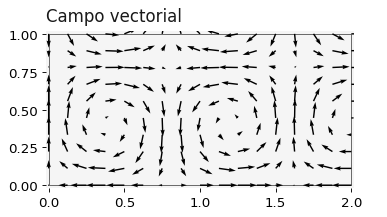

In [101]:
axis_par = [dict(aspect = 'equal')] 
v = vis.Plotter(1,1, axis_par, dict(figsize=(5,5)))

# Definimos un canvas donde graficar
v.set_canvas(1, Lx, Ly)

# Dibujamos el campo vectorial en forma de vectores
v.quiver(1, xg, yg, U, V, ticks = True)

# Se grafica un marco
v.plot_frame(1, xg, yg, ticks=False)

# Se agrega una título a la gráfica
v.axes(1).set_title('Campo vectorial', fontsize=15)

v.show()

<div class="alert alert-success">

5. Construye una figura con dos gráficas ($1 \times 2$) y en la primera dibuja el campo escalar usando líneas de contornos con el mapa de color `Greys` y en la segunda el campo vectorial usando líneas de flujo (*streamslines*) 

</div>

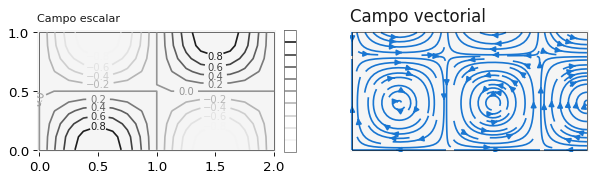

In [102]:
axis_par = [dict(aspect = 'equal')] 
axis_par = [a_p for i in range(0,2)]

v = vis.Plotter(1,2, axis_par, dict(figsize=(8,6)))

# Definimos un canvas y un marco para la primera gráfica
cax = v.set_canvas(1, Lx, Ly)
v.plot_frame(1, xg, yg, ticks=False)

# Graficamos con líneas de contornos
c = v.contour(1, xg, yg, T, ticks = True, levels = 10, cmap = 'Greys')
v.fig.colorbar(c, cax=cax, ticks = [], shrink=0.5, orientation='vertical')

# A traves de los ejes hacemos algunas operaciones
ax1 = v.axes(1)
ax1.clabel(c, fontsize=9, inline=True)
ax1.set_title('Campo escalar', fontsize=10)

# Definimos un canvas para la segunda gráfica
v.set_canvas(2, Lx, Ly)

# Graficamos el campo vectorial usando líneas de flujo
v.streamplot(2, xg, yg, U, V, ticks = False)

# Se grafica un marco
v.plot_frame(2, xg, yg, ticks=False)

# Se agrega una título a la gráfica
v.axes(2).set_title('Campo vectorial', fontsize=15)

v.show()

<div class="alert alert-success">

6. Dibuja las seis gráficas anteriores en un solo `Plotter`.

</div>

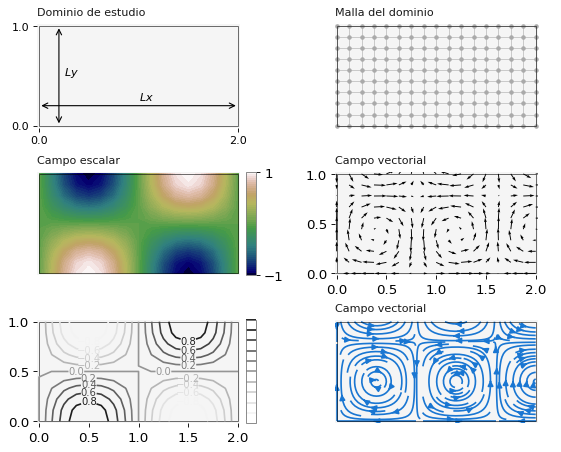

In [106]:
a_p = dict(aspect = 'equal')
axis_par = [a_p for i in range(0,6)]

v = vis.Plotter(3,2, axis_par, dict(figsize=(8,6)))

v.set_canvas(1, Lx, Ly)
v.draw_domain(1, xg, yg)
v.axes(1).set_title('Dominio de estudio', fontsize=10)

v.set_canvas(2, Lx, Ly)
v.plot_mesh2D(2, xg, yg, nodeson = True)
v.plot_frame(2, xg, yg, ticks=False)
v.axes(2).set_title('Malla del dominio', fontsize=10)

cax = v.set_canvas(3, Lx, Ly)
c = v.contourf(3, xg, yg, T, ticks = False, levels = 50, cmap = 'gist_earth')
v.fig.colorbar(c, cax=cax, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
v.plot_frame(3, xg, yg, ticks=False)
v.axes(3).set_title('Campo escalar', fontsize=10)

v.set_canvas(4, Lx, Ly)
v.quiver(4, xg, yg, U, V, ticks = True)
v.plot_frame(4, xg, yg, ticks=False)
v.axes(4).set_title('Campo vectorial', fontsize=10)

cax = v.set_canvas(5, Lx, Ly)

v.plot_frame(5, xg, yg, ticks=False)

c = v.contour(5, xg, yg, T, ticks = True, levels = 10, cmap = 'Greys')
v.fig.colorbar(c, cax=cax, ticks = [], shrink=0.5, orientation='vertical')
ax3 = v.axes(3)
ax3.clabel(c, fontsize=9, inline=True)
ax3.set_title('Campo escalar', fontsize=10)

v.set_canvas(6, Lx, Ly)
v.streamplot(6, xg, yg, U, V, ticks = False)
v.plot_frame(6, xg, yg, ticks=False)
v.axes(6).set_title('Campo vectorial', fontsize=10)

v.fig.tight_layout(h_pad=0.5, w_pad=2.0)
v.show()

<div class="alert alert-success">

7. Construye un plotter de $1 \times 2$ y dibuja en la primera gráfica el campo escalar usando un mapa de color y líneas de contorno sobrepuestas, y en la segunda gráfica dibuja el mismo campo escalar en 3D.

</div>

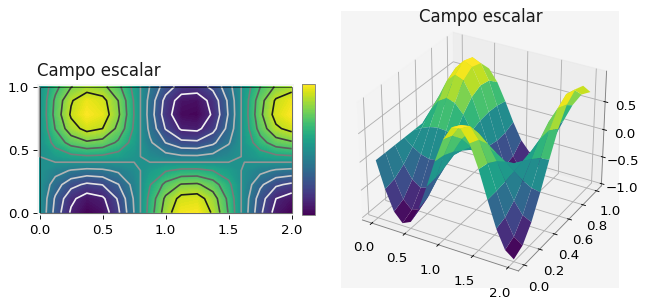

In [85]:
axis_par = [dict(aspect = 'equal'), dict(projection='3d', aspect='auto')]
v = vis.Plotter(1,2, axis_par, dict(figsize=(8,6)))

# Primera gráfica
cax = v.set_canvas(1, Lx, Ly)
c = v.contourf(1, xg, yg, U, levels = 100, cmap='viridis')
v.contour(1, xg, yg, U, levels=10, cmap='Greys')
v.fig.colorbar(c, cax=cax, ticks = [], shrink=0.5, orientation='vertical')
v.plot_frame(1, xg, yg, ticks=False)
v.axes(1).set_title('Campo escalar', fontsize=15)

# Segunda gráfica
v.plot_surface(2, xg, yg, U, cmap='viridis')
v.axes(2).set_title('Campo escalar', fontsize=15)

v.fig.tight_layout(h_pad=0.5, w_pad=2.0)
v.show()

<div class="alert alert-success">

8. Ejectua la siguiente celda de código.

</div>

In [1]:
%run "./interactivo_test.ipynb"

Output()